In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Finding the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

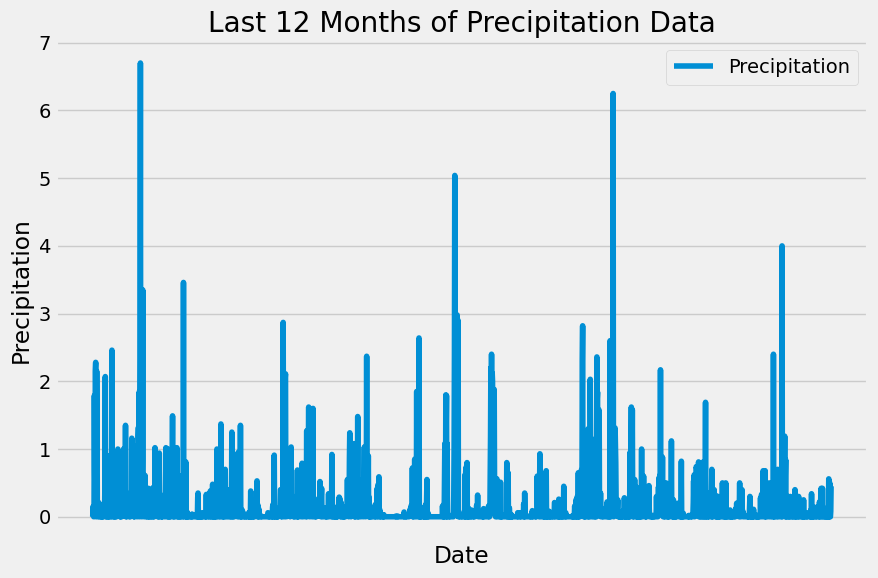

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from datetime import datetime, timedelta
# Calculate the date 1 year ago from the last data point in the database
msmt_test = session.query(Measurement).order_by(Measurement.date.desc()).first()
last_test = pd.to_datetime(msmt_test.date)
first_test = last_test - timedelta(days=365)
first_date = dt.date(first_test.year, first_test.month, first_test.day)
last_date = dt.date(last_test.year, last_test.month, last_test.day)

# Perform a query to retrieve the data and precipitation scores
msmt_year = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= first_date).\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_year_df = pd.DataFrame(msmt_year,columns=['Date','Precipitation'])
precip_year_df = precip_year_df.set_index('Date')
precip_year_df = precip_year_df.fillna(0)

# Sort the dataframe by date
precip_year_df.sort_values(by='Date')
precip_year_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.style.use('fivethirtyeight')
precip_year_df.plot(figsize=(9,6))
plt.xticks([])
plt.legend(['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Last 12 Months of Precipitation Data')
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_year_df.describe()

,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station).count()
print(f'The total number of stations in this dataset is {num_stations}')


The total number of stations in this dataset is 9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()#.distinct(Station.station).count()#group_by(Station.station).all()
station_count = {station: count for station, count in station_count}
print('Stations and Counts:')
print('--------------------')
for station,count in station_count.items():
    print(station,count)
print('====================')

# station_count
station_list = list(station_count)
top_station = station_list[0]
top_station_count = station_count[top_station]
print(f'The most active station is {top_station} with {top_station_count} counts')

Stations and Counts:
--------------------
USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511
The most active station is USC00519281 with 2772 counts


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station_temps = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == top_station).all()
print(top_station_temps)
top_station_low, top_station_high, top_station_avg = top_station_temps[0]

print(f'\nFor the most active station ({top_station}):')
print(f'Lowest temperature recorded: {top_station_low}')
print(f'Highest temperature recorded: {top_station_high}')
print(f'Average temperature recorded: {top_station_avg}')

[(54.0, 85.0, 71.66378066378067)]

For the most active station (USC00519281):
Lowest temperature recorded: 54.0
Highest temperature recorded: 85.0
Average temperature recorded: 71.66378066378067


Text(0.5, 4.183333333333314, 'Temperature')

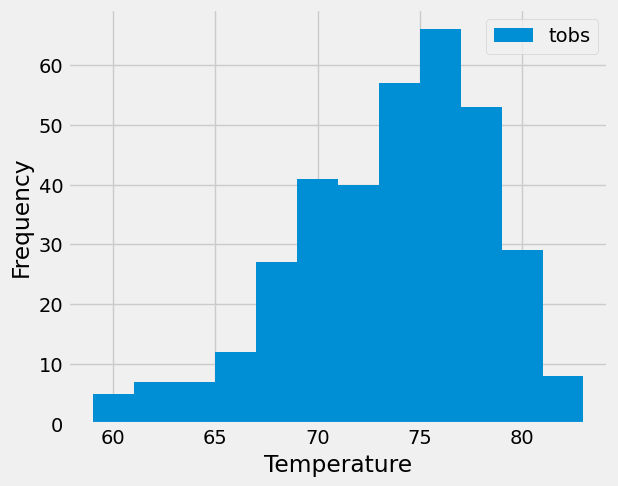

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_date).all()

date_temp_df = pd.DataFrame(results, columns=["tobs"])
date_temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")


# Close Session

In [ ]:
# Close Session
session.close()